# Práctica 1

### Analytics Product Management

### Marzo 2025

**Yudy Castaño Aristizábal**

Maestría en Business Analytics

**Universidad del Rosario**


In [1]:
from IPython.display import Image, display
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, f1_score, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\vecin\AppData\Local\Temp\ipykernel_2668\2294740541.py:1: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython.display
  from IPython.core.display import Image, display


In [2]:
def load_data():
  data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.data',
                     delimiter=" ",
                     header=None)
  data.columns=['existingchecking',
                'duration',
                'credithistory',
                'purpose',
                'creditamount',
                'savings',
                'employmentsince',
                'installmentrate',
                'statussex',
                'otherdebtors',
                'residencesince',
                'property',
                'age',
                'otherinstallmentplans',
                'housing',
                'existingcredits',
                'job',
                'peopleliable',
                'telephone',
                'foreignworker',
                'target'
                ]
  data.loc[:,'target'] = data['target'].replace([1,2],[1,0])
  return data

In [3]:
data = load_data()
print("Cargadas {0:d} observaciones con {1:d} columnas\n".format(len(data), len(data.columns)))


Cargadas 1000 observaciones con 21 columnas



In [4]:
data.head()

,existingchecking,duration,credithistory,purpose,creditamount,savings,employmentsince,installmentrate,statussex,otherdebtors,...,property,age,otherinstallmentplans,housing,existingcredits,job,peopleliable,telephone,foreignworker,target
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,0
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,0


Antes de empezar con la actividad, queremos saber de que trata la base, por lo que haremos un descriptivo.

In [5]:

def describir_base_datos(data):

    print("Información general de la base de datos:\n")
    print(data.info())

    print("\nEstadísticas descriptivas de las variables numéricas:\n")
    print(data.describe())

    print("\nValores únicos de las variables categóricas:\n")
    for columna in data.select_dtypes(include=['object', 'category']).columns:
        print(f"\nColumna: {columna}")
        print(data[columna].unique())

    print("\nFrecuencia de la variable 'target':\n")
    print(data['target'].value_counts()) # Calcula y muestra las frecuencias de 'target'

    print("\nValores faltantes por columna:\n")
    print(data.isnull().sum())

describir_base_datos(data)

Información general de la base de datos:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   existingchecking       1000 non-null   object
 1   duration               1000 non-null   int64 
 2   credithistory          1000 non-null   object
 3   purpose                1000 non-null   object
 4   creditamount           1000 non-null   int64 
 5   savings                1000 non-null   object
 6   employmentsince        1000 non-null   object
 7   installmentrate        1000 non-null   int64 
 8   statussex              1000 non-null   object
 9   otherdebtors           1000 non-null   object
 10  residencesince         1000 non-null   int64 
 11  property               1000 non-null   object
 12  age                    1000 non-null   int64 
 13  otherinstallmentplans  1000 non-null   object
 14  housing                1000 non



---


**Descripción de la base de datos**

---



Esta base de datos contiene información sobre clientes de un banco y sus solicitudes de crédito. Cada fila representa una solicitud de crédito individual; tiene 20 columnas que son variables o caracteristicas de los clientes o de la solicitud, 8 de ellas son variables numéricas y 12 variables categóricas,  asimismo, tiene una variable objetivo **-Target-** que indica si la solicitud representa un riesgo bajo o un riesgo alto. (0 ó 1), en la base el 70% de las solicitudes son de riesgo bajo.

Algunas caracteristicas para tener en cuenta

*   Ninguna variable contiene missing.
*   La variable con más categorias es Purpose (Propósito del credito)
*   Las variables categoricas tienen entre 3 y 5 valores únicos o categorias por variable.





# 1. Codificación de variables categóricas (20%).

Vamos a trabajar con una base de datos de un problema de crédito. Cada observación tiene datos de los clientes y de la operación concreta. El *target* indica si la operación salió bien (*target*=1) o no (*target*=2). En la carga de datos hemos transformado los *target*=2 en ceros para seguir la notación usada en la sesión anterior.

Lea la [descripción de los datos](https://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.doc) y divida las variables (excepto el *target*) en dos listas
- `v_cat`, con los nombres de las variables que sean categóricas
- `v_num`, con los nombres de las variables que sean numéricas

In [6]:
# Crea la lista v_cat con los nombres de las variables categóricas
v_cat = data.select_dtypes(include=['object', 'category']).columns.tolist()

# Crea la lista v_num con los nombres de las variables numéricas (excluyendo
# "target")
v_num = data.select_dtypes(include=['number']).columns.tolist()

if 'target' in v_num:
    v_num.remove('target')

# Imprime las listas
print("Lista de variables categóricas (v_cat):", v_cat)
print("Lista de variables numéricas (v_num):", v_num)

##Esto es crucial para aplicar transformaciones diferentes a cada tipo de variable.

Lista de variables categóricas (v_cat): ['existingchecking', 'credithistory', 'purpose', 'savings', 'employmentsince', 'statussex', 'otherdebtors', 'property', 'otherinstallmentplans', 'housing', 'job', 'telephone', 'foreignworker']
Lista de variables numéricas (v_num): ['duration', 'creditamount', 'installmentrate', 'residencesince', 'age', 'existingcredits', 'peopleliable']


Instancie un objeto *one hot encoder* de sklearn para codificar las variables categóricas.

Explote el método [`get_feature_names`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html#sklearn.preprocessing.OneHotEncoder.get_feature_names) para asignar un nombre a cada variables transformada que tenga relación con la variable original.

Finalmente construya un *dataframe* de pandas análogo al *dataframe* `data` llamado `data_ohe` cuyas columnas sean las columnas correspondientes a las variables resultantes de la codificación *one hot encoding* seguidas de las columnas de las variables numéricas.

In [7]:
# sklearn OneHotEncoder

##  -----------------------------------------------------------------------------   ##
## La codificación one-hot transforma las variables categóricas en múltiples variables
##  binarias, donde cada variable binaria representa una categoría única.
##  -----------------------------------------------------------------------------   ##

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer


preprocessor = ColumnTransformer(
                   [('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False), v_cat)],
                remainder = 'passthrough',
                verbose_feature_names_out = False
               ).set_output(transform="pandas")

dta_ohe = preprocessor.fit_transform(data)

dta_ohe.head(3)

,existingchecking_A11,existingchecking_A12,existingchecking_A13,existingchecking_A14,credithistory_A30,credithistory_A31,credithistory_A32,credithistory_A33,credithistory_A34,purpose_A40,...,foreignworker_A201,foreignworker_A202,duration,creditamount,installmentrate,residencesince,age,existingcredits,peopleliable,target
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,6,1169,4,4,67,2,1,1
1,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,48,5951,2,2,22,1,1,0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,12,2096,2,3,49,1,2,1


# 2. Divida la base de datos en dos conjuntos, entrenamiento y test con un 70% de observaciones en el conjunto de entrenamiento

In [8]:
x_train, x_test, y_train, y = train_test_split(dta_ohe, data['target'], test_size=0.3, random_state=42)

print("Forma de x_train:", x_train.shape)
print("Forma de x_test:", x_test.shape)
print("Forma de y_train:", y_train.shape)
print("Forma de y:", y.shape)

Forma de x_train: (700, 62)
Forma de x_test: (300, 62)
Forma de y_train: (700,)
Forma de y: (300,)


# 3. Escalado (20%)
Razone si las variables de entrada necesitan un escalado y, de ser así, proponga uno de los escalados disponibles en sklearn y realice la transformación.

**Respuesta:** La necesidad de escalado depende del modelo a utilizar. Random Forest no lo necesita, pero KNN si. Se presentan las dos opciones de escalado.

In [9]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)


In [10]:
scaler = MinMaxScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# 4. Análisis con Random Forest para conseguir prestaciones top baseline (10%)

Vamos a realizar una estimación de las prestaciones más precisas que podríamos alcanzar al modelar esta base de datos con aprendizaje automático.

Para ello emplearemos *Random Forest* buscando valores para el número de hojas y el tamaño del bosque.




In [11]:
##  -----------------------------------------------------------------------------   ##
##  Se utiliza StratifiedKFold para garantizar que la proporción de clases de
##  Target se mantenga en cada pliegue de validación cruzada.
##  -----------------------------------------------------------------------------   ##

from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, f1_score, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

def analizar_random_forest_optimo(dta_ohe, target_col='target', test_size=0.3, random_state=42, cv_splits=3):

    X = dta_ohe.drop(columns=[target_col])
    y = dta_ohe[target_col]

    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state, stratify=y)

    rf = RandomForestClassifier(random_state=random_state)

    param_grid = {
        'n_estimators': [100, 300, 500, 700, 900],
        'max_depth': [5, 10, 20, 30, None],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }

    cv = StratifiedKFold(n_splits=cv_splits, shuffle=True, random_state=random_state)
    grid_search = GridSearchCV(rf, param_grid, cv=cv, scoring=['accuracy', 'precision', 'recall', 'f1', 'roc_auc'], refit='accuracy', n_jobs=-1, verbose=0)
    grid_search.fit(x_train, y_train)

    best_rf = grid_search.best_estimator_

    y_pred = best_rf.predict(x_test)
    y_pred_proba = best_rf.predict_proba(x_test)[:, 1]

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba)

    print("Mejores hiperparámetros:", grid_search.best_params_)
    print("Precisión:", accuracy)
    print("Precisión:", precision)
    print("Recuperación:", recall)
    print("Puntuación F1:", f1)
    print("AUC ROC:", roc_auc)
    print("Reporte de clasificación:\n", classification_report(y_test, y_pred))

    #Extra#
    feature_importances = pd.Series(best_rf.feature_importances_, index=x_train.columns).sort_values(ascending=False)
    print("\nRanking de variables por importancia de Random Forest:")
    print(feature_importances)

    return grid_search.best_params_, (accuracy, precision, recall, f1, roc_auc), feature_importances



In [12]:

mejores_params, metrics, ranking_variables = analizar_random_forest_optimo(dta_ohe)

Mejores hiperparámetros: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 300}
Precisión: 0.75
Precisión: 0.7626459143968871
Recuperación: 0.9333333333333333
Puntuación F1: 0.8394004282655246
AUC ROC: 0.7887301587301587
Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.67      0.32      0.44        90
           1       0.76      0.93      0.84       210

    accuracy                           0.75       300
   macro avg       0.72      0.63      0.64       300
weighted avg       0.74      0.75      0.72       300


Ranking de variables por importancia de Random Forest:
creditamount            0.100965
duration                0.090775
age                     0.070037
existingchecking_A14    0.066717
existingchecking_A11    0.051773
                          ...   
purpose_A45             0.002529
purpose_A410            0.001994
job_A171                0.001818
purpose_A44             0.000346
purpose_

---
**Analisis de Resultados**

---

```
# {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 300}
```

 Estos son los mejores  hiperparámetros que produjeron el mejor rendimiento en el conjunto de validación cruzada.

* max_depth: La profundidad máxima de los árboles en el bosque es 10.

* min_samples_leaf: El número mínimo de muestras requeridas para estar en un nodo hoja es 10.

* min_samples_split: El número mínimo de muestras requeridas para dividir un nodo interno es 5.

* n_estimators: El número de árboles en el bosque es 300.

Métricas de Evaluación

* Precisión: El modelo clasifica correctamente el 75% de las muestras en general.
* Precisión: El modelo clasifica correctamente el 76.26% de las muestras de la clase 1 (crédito "bueno").
* Recuperación: 1.0: El modelo identifica correctamente el 93.33% de todas las muestras de la clase 1. Esto indica que el modelo es muy bueno para detectar créditos "buenos".
* Puntuación F1: La puntuación F1 es una medida equilibrada de precisión y recuperación. Un valor de 0.8394 indica un buen rendimiento general.
* AUC ROC: El área bajo la curva ROC mide la capacidad del modelo para distinguir entre las clases. Un valor de 0.7887 indica una buena capacidad de discriminación.



# 5. Análisis de relevancia basado en información mutua

## 5.1.- Realice un ranking de las variables de entrada en orden decreciente de información mutua con la clase *target* (10%).

Discuta la idoneidad de este ranking bajo el punto de vista del negocio.

In [13]:

from sklearn.feature_selection import mutual_info_classif
import matplotlib.pyplot as plt
import seaborn as sns

def analizar_relevancia_informacion_mutua(dta_ohe, target_col='target', test_size=0.3, random_state=42):

    X = dta_ohe.drop(columns=[target_col])
    y = dta_ohe[target_col]

    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

    f_test = mutual_info_classif(x_train, y_train, random_state=random_state)
    feature_scores = pd.Series(f_test, index=x_train.columns).sort_values(ascending=False)

    print("Ranking de variables por información mutua:")
    print(feature_scores)

    plt.figure(figsize=(10, len(feature_scores) * 0.3))
    sns.barplot(x=feature_scores, y=feature_scores.index)
    plt.title("Información mutua por variable")
    plt.xlabel("Puntuación de información mutua")
    plt.ylabel("Variable")
    plt.show()

    return feature_scores


Ranking de variables por información mutua:
statussex_A93                 0.051270
savings_A61                   0.046889
credithistory_A34             0.042530
employmentsince_A75           0.042330
existingchecking_A14          0.039196
                                ...   
savings_A62                   0.000000
savings_A63                   0.000000
savings_A64                   0.000000
employmentsince_A73           0.000000
otherinstallmentplans_A143    0.000000
Length: 61, dtype: float64


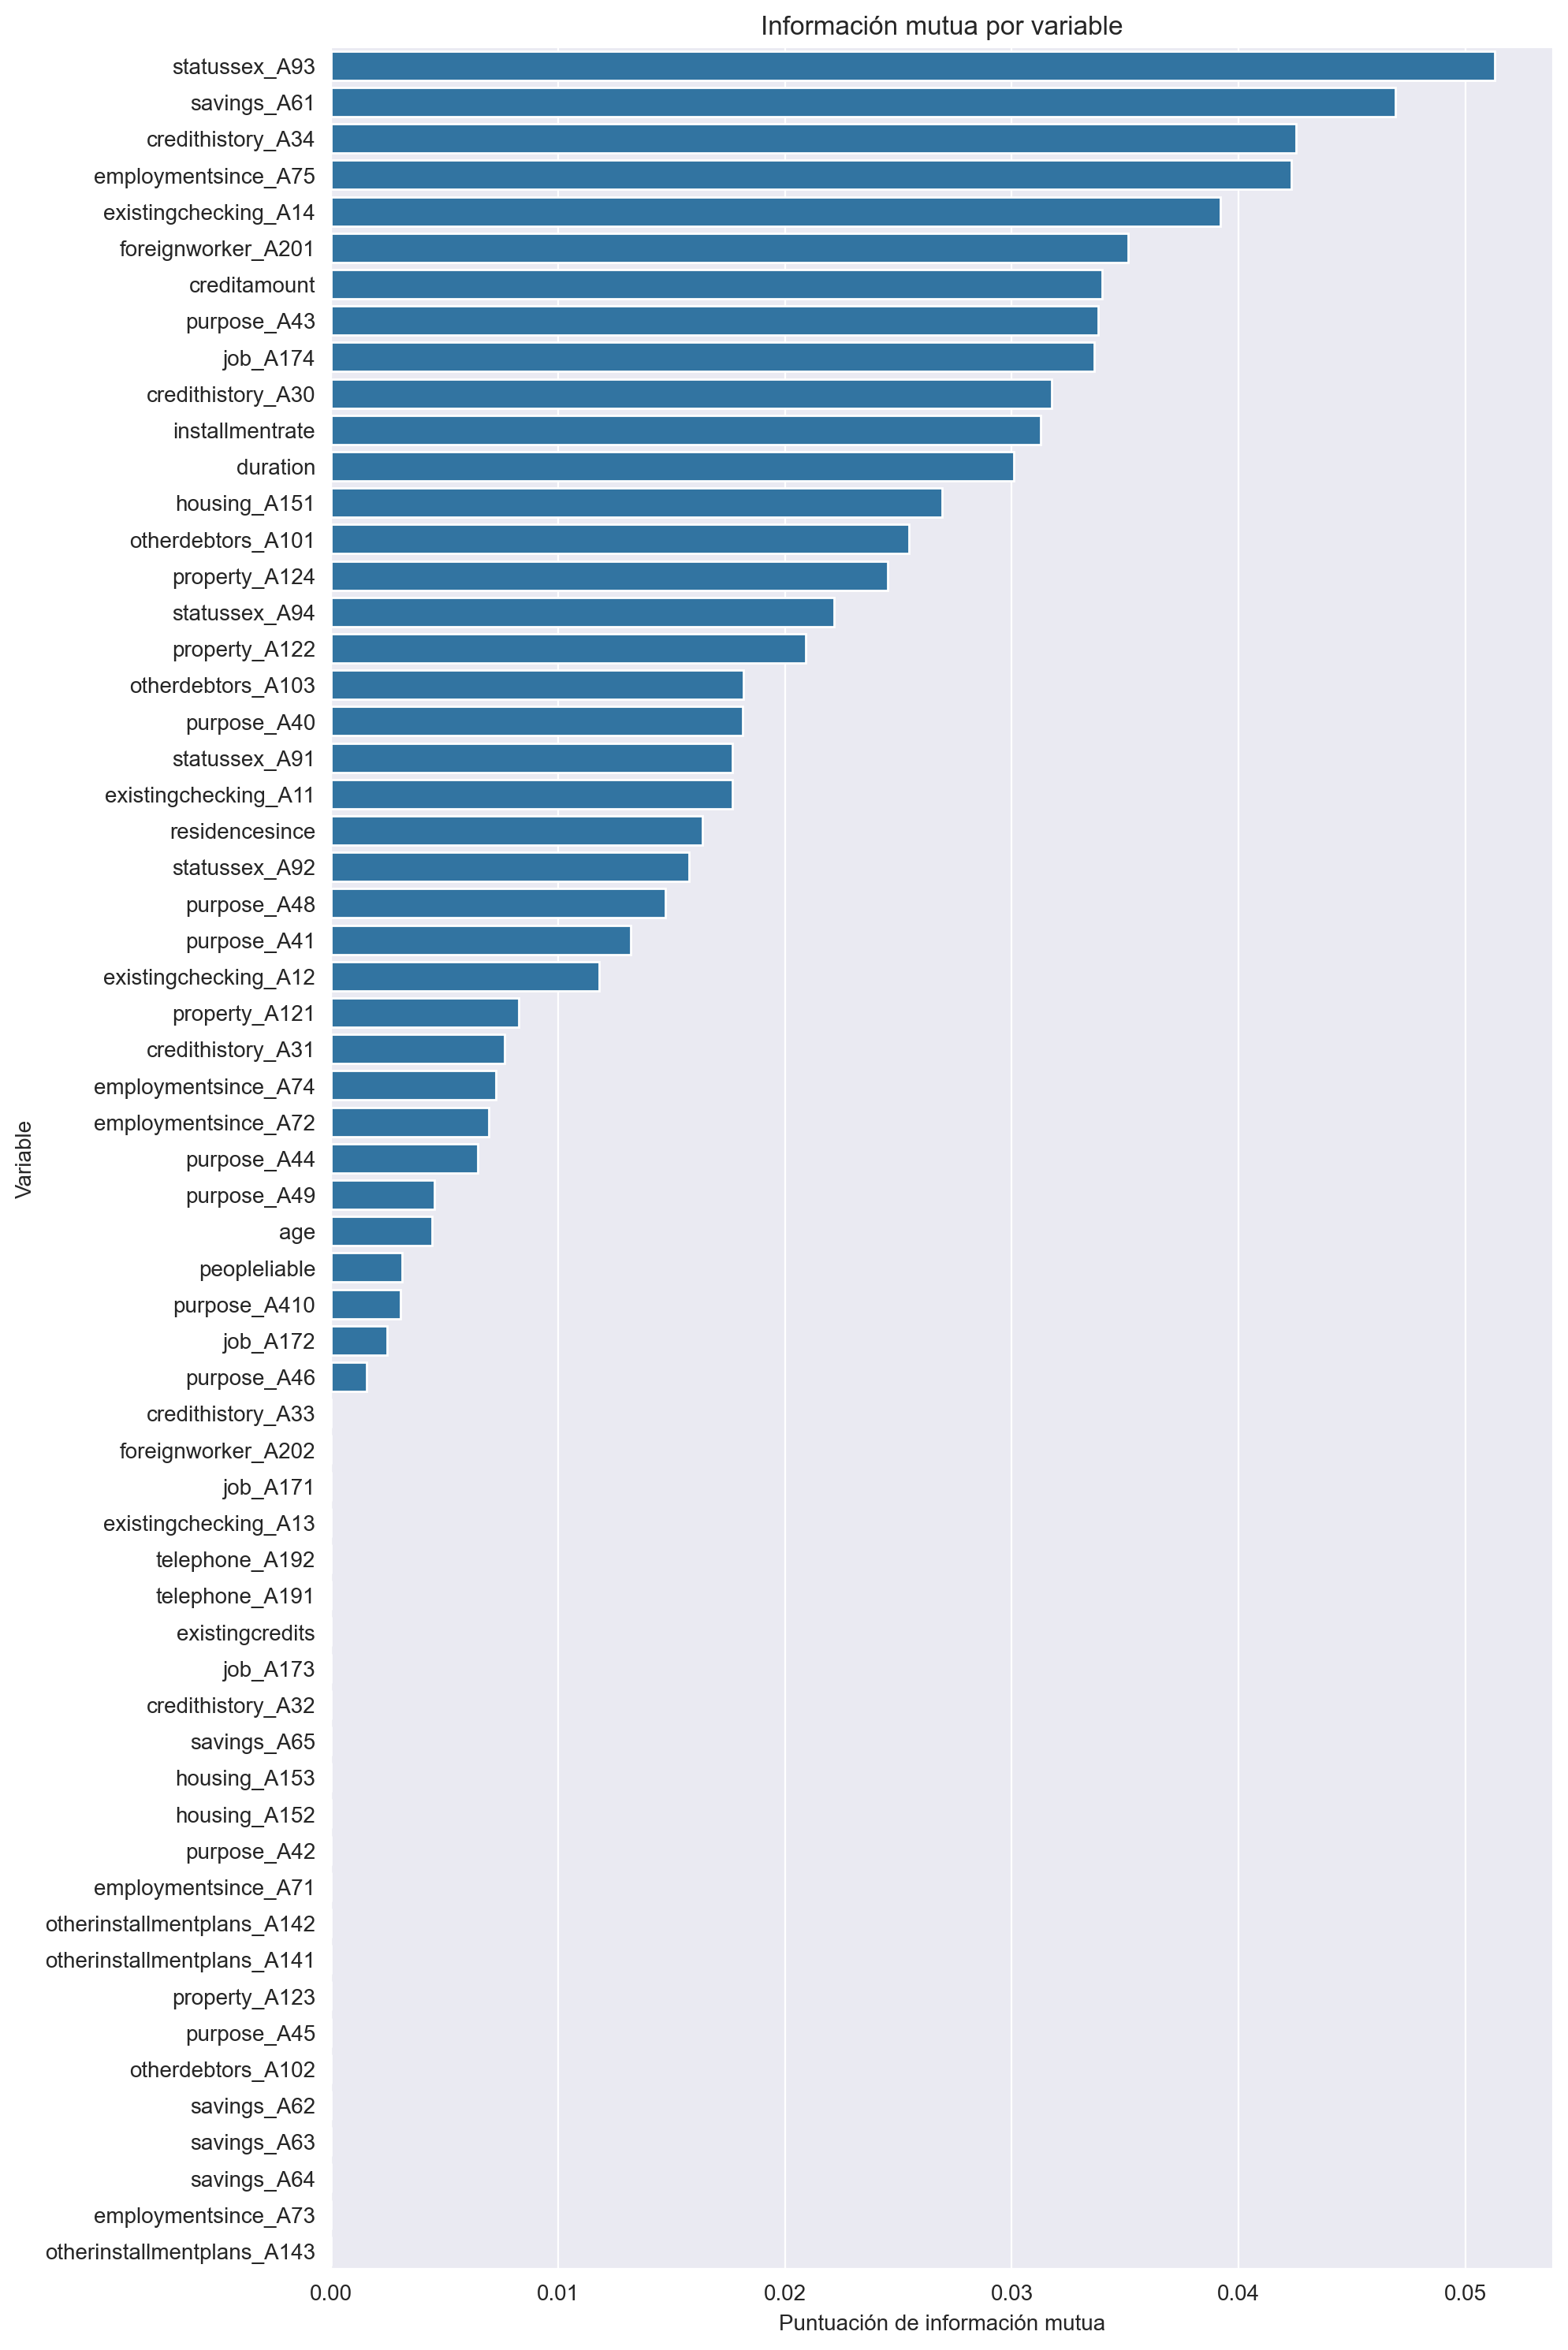

In [14]:
feature_scores = analizar_relevancia_informacion_mutua(dta_ohe)


---
**Analisis de resultados**

---
Los resultados muestran el ranking de variables por información mutua con la variable objetivo 'target'. La información mutua mide la dependencia entre dos variables, en este caso, entre cada variable predictora y la variable objetivo que indica si el crédito fue aceptado o negado de acuerdo al riesgo observado.


Variables más relevantes:

* `statussex_A93`: Esta variable, que probablemente se refiere al estado civil y sexo del solicitante, tiene la mayor información mutua (0.051270). Esto sugiere que el estado civil y sexo del solicitante son los predictores más relevantes para determinar si un crédito será bueno o malo.
* `savings_A61`: Esta variable, que probablemente se refiere al nivel de ahorros del solicitante, también tiene una alta información mutua (0.046889), lo que indica que el nivel de ahorros es un factor importante en la predicción del riesgo crediticio.

Otras variables relevantes incluyen credithistory_A34 (historial crediticio) y employmentsince_A75 (tiempo de empleo).

## 5.2. Selección de variables con información mutua y validación cruzada (15%)

Como primera aproximación a la resolución del problema con un número reducido de variables, construya un *pipeline* conectando una etapa de selección de variables por información mutua seguida de un clasificador basado en $k$NN.

Explore combinaciones razonables de número de variables elegidas y números de vecinos que permitan una explicación sencilla de las decisiones.

Diseñe un procedimiento de validación cruzada para optimizar estos hiperparámetros y compare las prestaciones alcanzadas con aquellas obtenidas mediante Random Forest.

In [15]:

from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, f1_score, roc_auc_score

def seleccionar_variables_knn_varias_k(dta_ohe, target_col='target', test_size=0.3, random_state=42, cv_splits=3, k_values=[10, 20, 30]):
    """
    Selecciona variables con información mutua y entrena un modelo KNN con validación cruzada para varios valores de k.

    Args:
        dta_ohe (pd.DataFrame): DataFrame con variables codificadas one-hot.
        target_col (str): Nombre de la columna objetivo.
        test_size (float): Tamaño del conjunto de prueba.
        random_state (int): Semilla para reproducibilidad.
        cv_splits (int): Número de folds para validación cruzada.
        k_values (list): Lista de números de variables a seleccionar.

    Returns:
        dict: Diccionario con resultados para cada valor de k.
    """
    X = dta_ohe.drop(columns=[target_col])
    y = dta_ohe[target_col]

    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state, stratify=y)

    resultados = {}
    for k in k_values:
        pipeline = Pipeline([
            ('select', SelectKBest(score_func=mutual_info_classif, k=k)),
            ('scaler', StandardScaler()),
            ('knn', KNeighborsClassifier())
        ])

        param_grid = {
            'knn__n_neighbors': [3, 5, 7, 10, 15],
            'knn__weights': ['uniform', 'distance']
        }

        cv = StratifiedKFold(n_splits=cv_splits, shuffle=True, random_state=random_state)
        grid_search = GridSearchCV(pipeline, param_grid, cv=cv, scoring=['accuracy', 'precision', 'recall', 'f1', 'roc_auc'], refit='accuracy', n_jobs=-1, verbose=0)
        grid_search.fit(x_train, y_train)

        best_params = grid_search.best_params_
        best_knn = grid_search.best_estimator_

        y_pred = best_knn.predict(x_test)
        y_pred_proba = best_knn.predict_proba(x_test)[:, 1]

        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        roc_auc = roc_auc_score(y_test, y_pred_proba)
        # Obtener las variables seleccionadas
        selected_features = x_train.columns[grid_search.best_estimator_.named_steps['select'].get_support()]
        riesgo_entrenamiento = grid_search.score(x_train, y_train)
        riesgo_test = grid_search.score(x_test, y_test)

        resultados[k] = {
            'best_params': best_params,
            'metrics': (accuracy, precision, recall, f1, roc_auc),
            'model': best_knn,
            'selected_features': selected_features  # Agregar las variables seleccionadas
        }

        print(f"Resultados para k={k}:")
        print("Mejores hiperparámetros:", best_params)
        print("Precisión:", accuracy)
        print("Precisión:", precision)
        print("Recuperación:", recall)
        print("Puntuación F1:", f1)
        print("AUC ROC:", roc_auc)
        print("Reporte de clasificación:\n", classification_report(y_test, y_pred))
        print("Acierto en el conjunto de entrenamiento: {0:.2f}(%)".format(100.*riesgo_entrenamiento))
        print("Acierto en el conjunto de test: {0:.2f}(%)".format(100.*riesgo_test))
        print("Variables seleccionadas:", selected_features)  # Imprimir las variables seleccionadas

    return resultados


In [16]:
resultados_knn = seleccionar_variables_knn_varias_k(dta_ohe)

Resultados para k=10:
Mejores hiperparámetros: {'knn__n_neighbors': 10, 'knn__weights': 'uniform'}
Precisión: 0.7266666666666667
Precisión: 0.7807017543859649
Recuperación: 0.8476190476190476
Puntuación F1: 0.8127853881278538
AUC ROC: 0.7178306878306879
Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.56      0.44      0.49        90
           1       0.78      0.85      0.81       210

    accuracy                           0.73       300
   macro avg       0.67      0.65      0.65       300
weighted avg       0.71      0.73      0.72       300

Acierto en el conjunto de entrenamiento: 75.86(%)
Acierto en el conjunto de test: 72.67(%)
Variables seleccionadas: Index(['existingchecking_A11', 'existingchecking_A14', 'purpose_A43',
       'savings_A64', 'otherdebtors_A101', 'otherdebtors_A103',
       'otherinstallmentplans_A141', 'job_A174', 'duration', 'peopleliable'],
      dtype='object')
Resultados para k=20:
Mejores hiperparámet



---

**Analisis de resultados**

---

El modelo con **10** variables (k=10) parece ofrecer el mejor equilibrio entre rendimiento y generalización, con el menor indicio de sobreajuste.
Los modelos con 20 y 30 variables muestran un sobreajuste significativo.

**Mejores Hiperparámetros:**

`knn__n_neighbors:` Se utilizan 7 vecinos para la clasificación.

`knn__weights:` 'uniform' Todos los vecinos tienen el mismo peso.

**Métricas de Evaluación:**

* **Precisión**: En este caso, el modelo acertó en el 75.67% de las veces que predijo que un crédito era "bueno".

* **Recuperación**: En este caso, el modelo identificó correctamente el 88.57% de todos los créditos que eran realmente "buenos".

* **Puntuación**:  Un valor de 0.8360 indica que el modelo tiene un buen equilibrio entre precisión y recuperación.

* **AUC ROC**: Un valor de 0.7242 indica que el modelo tiene una capacidad moderada para distinguir entre créditos "buenos" y "malos".

* **Reporte de Clasificación:**
La clase 1 (crédito "bueno") tiene una precisión del 79% y una recuperación del 89%.
La clase 0 (crédito "malo") tiene una precisión del 63% y una recuperación del 46%.

* **Variables**
Las variables seleccionadas para este modelo, estan relacionadas en gran medida con la historia crediticia del cliente, el propósito del crédito, el tiempo de empleabilidad del cliente, el tipo de vivienda :

       'existingchecking_A14', 'credithistory_A30', 'credithistory_A32',
       'credithistory_A34', 'purpose_A41', 'employmentsince_A75',
       'otherdebtors_A102', 'property_A121', 'housing_A153',
       'existingcredits'

El modelo muestra un buen equilibrio entre precisión y recuperación.
Hay una ligera tendencia a clasificar mejor la clase 1 que la clase 0.
El rendimiento en el conjunto de entrenamiento es similar al conjunto de prueba, lo que sugiere que no hay sobreajuste significativo.


# 6. Añadir variables al modelo recursivamente (15%)

Como segunda aproximación a la resolución del problema con un número reducido de variables implemente un bucle que en cada iteración vaya añadiendo una variable (siguiendo el procedimiento explicado en la sesión) y almacene el error en test resultante del modelo entrenado en cada iteración.

Imprima el orden en el que se han introducido las variables y compárelo con el orden sugerido por información mutua

Adicionalmente represente gráficamente la precisión del modelo frente al número de variables.

In [17]:
def agregar_variables_recursivamente(dta_ohe, target_col='target', test_size=0.3, random_state=42):
    """
    Agrega variables al modelo recursivamente y grafica la precisión.

    Args:
        dta_ohe (pd.DataFrame): DataFrame con variables codificadas one-hot.
        target_col (str): Nombre de la columna objetivo.
        test_size (float): Tamaño del conjunto de prueba.
        random_state (int): Semilla para reproducibilidad.

    Returns:
        tuple: Orden de variables añadidas y lista de precisiones en prueba.
    """
    X = dta_ohe.drop(columns=[target_col])
    y = dta_ohe[target_col]

    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state, stratify=y)

    orden_variables = []
    precisiones_test = []

    variables_actuales = []
    for _ in range(X.shape[1]):
        mejores_variables = []
        mejor_precision = 0

        variables_restantes = [col for col in X.columns if col not in variables_actuales]
        for variable in variables_restantes:
            variables_prueba = variables_actuales + [variable]
            model = RandomForestClassifier(random_state=random_state)
            model.fit(x_train[variables_prueba], y_train)
            y_pred = model.predict(x_test[variables_prueba])
            precision = accuracy_score(y_test, y_pred)

            if precision > mejor_precision:
                mejor_precision = precision
                mejores_variables = variables_prueba + []

        variables_actuales = mejores_variables
        orden_variables.append(variables_actuales[-1])
        precisiones_test.append(mejor_precision)

    print("Orden de variables añadidas:", orden_variables)

    plt.plot(range(1, len(precisiones_test) + 1), precisiones_test)
    plt.xlabel("Número de variables")
    plt.ylabel("Precisión en prueba")
    plt.title("Precisión vs. Número de variables añadidas")
    plt.show()

    return orden_variables, precisiones_test



Orden de variables añadidas: ['credithistory_A30', 'credithistory_A31', 'existingchecking_A14', 'property_A124', 'credithistory_A32', 'purpose_A48', 'savings_A63', 'credithistory_A33', 'savings_A65', 'otherinstallmentplans_A141', 'credithistory_A34', 'purpose_A44', 'property_A121', 'purpose_A45', 'purpose_A49', 'statussex_A91', 'foreignworker_A201', 'purpose_A410', 'foreignworker_A202', 'job_A171', 'housing_A151', 'property_A122', 'property_A123', 'existingchecking_A13', 'purpose_A41', 'savings_A64', 'purpose_A46', 'employmentsince_A74', 'statussex_A92', 'otherinstallmentplans_A142', 'existingchecking_A11', 'purpose_A42', 'installmentrate', 'telephone_A192', 'job_A173', 'savings_A61', 'housing_A152', 'housing_A153', 'statussex_A94', 'peopleliable', 'job_A172', 'age', 'residencesince', 'savings_A62', 'otherinstallmentplans_A143', 'statussex_A93', 'otherdebtors_A102', 'otherdebtors_A103', 'existingchecking_A12', 'employmentsince_A72', 'job_A174', 'purpose_A40', 'employmentsince_A71', 'ot

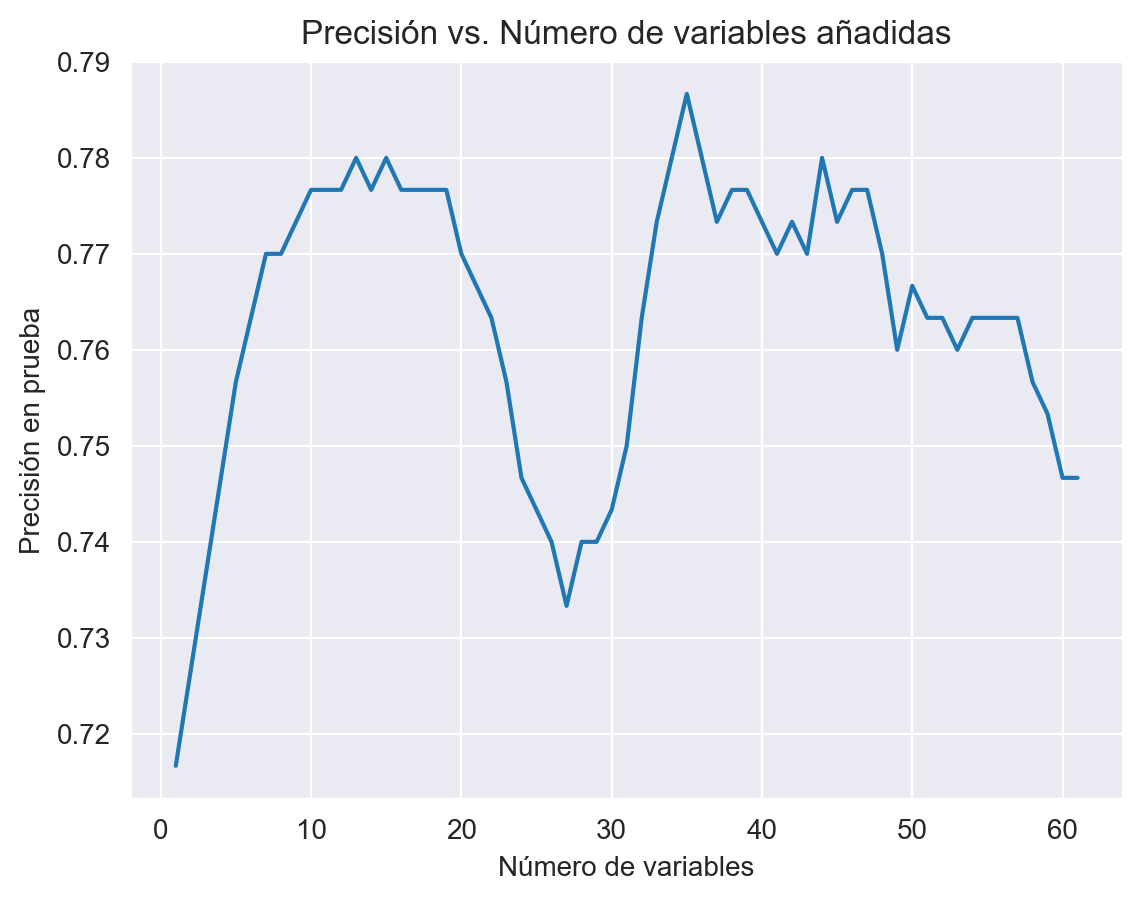

In [18]:
orden_vars, precisiones = agregar_variables_recursivamente(dta_ohe)

# 7. Eliminar variables del modelo recursivamente (10%)

Como tercera aproximación a la resolución del problema con un número reducido de variables implemente un bucle que en cada iteración vaya eliminando una variable (siguiendo el procedimiento explicado en la sesión) y almacene el error en test resultante del modelo entrenado en cada iteración.

Imprima el orden en el que se han eliminado las variables y compárelo con el orden sugerido por información mutua y por el bucle anterior

Adicionalmente represente gráficamente la precisión del modelo frente al número de variables.

In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

def eliminar_variables_recursivamente(dta_ohe, target_col='target', test_size=0.3, random_state=42):
    """
    Elimina variables del modelo recursivamente y grafica la precisión.

    Args:
        dta_ohe (pd.DataFrame): DataFrame con variables codificadas one-hot.
        target_col (str): Nombre de la columna objetivo.
        test_size (float): Tamaño del conjunto de prueba.
        random_state (int): Semilla para reproducibilidad.

    Returns:
        tuple: Orden de variables eliminadas y lista de precisiones en prueba.
    """
    X = dta_ohe.drop(columns=[target_col])
    y = dta_ohe[target_col]

    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state, stratify=y)

    orden_variables = []
    precisiones_test = []

    variables_actuales = list(X.columns)
    while len(variables_actuales) > 1:
        peor_variable = None
        mejor_precision = 0

        for variable in variables_actuales:
            variables_prueba = [v for v in variables_actuales if v != variable]
            model = RandomForestClassifier(random_state=random_state)
            model.fit(x_train[variables_prueba], y_train)
            y_pred = model.predict(x_test[variables_prueba])
            precision = accuracy_score(y_test, y_pred)

            if precision > mejor_precision:
                mejor_precision = precision
                peor_variable = variable

        variables_actuales.remove(peor_variable)
        orden_variables.append(peor_variable)
        precisiones_test.append(mejor_precision)

    print("Orden de variables eliminadas:", orden_variables)

    plt.plot(range(len(precisiones_test), 0, -1), precisiones_test)
    plt.xlabel("Número de variables")
    plt.ylabel("Precisión en prueba")
    plt.title("Precisión vs. Número de variables eliminadas")
    plt.show()

    return orden_variables, precisiones_test



Orden de variables eliminadas: ['savings_A62', 'purpose_A43', 'existingchecking_A12', 'otherdebtors_A103', 'foreignworker_A202', 'purpose_A46', 'purpose_A410', 'credithistory_A34', 'purpose_A41', 'statussex_A91', 'otherinstallmentplans_A143', 'housing_A153', 'residencesince', 'age', 'property_A124', 'employmentsince_A72', 'statussex_A93', 'credithistory_A32', 'employmentsince_A75', 'job_A171', 'purpose_A42', 'property_A123', 'purpose_A40', 'telephone_A191', 'peopleliable', 'statussex_A94', 'existingchecking_A11', 'otherinstallmentplans_A141', 'otherinstallmentplans_A142', 'job_A173', 'purpose_A49', 'employmentsince_A73', 'purpose_A44', 'existingchecking_A13', 'otherdebtors_A101', 'savings_A63', 'existingcredits', 'job_A172', 'telephone_A192', 'purpose_A45', 'purpose_A48', 'savings_A61', 'otherdebtors_A102', 'employmentsince_A74', 'housing_A151', 'foreignworker_A201', 'savings_A64', 'credithistory_A30', 'statussex_A92', 'property_A121', 'credithistory_A31', 'job_A174', 'credithistory_A3

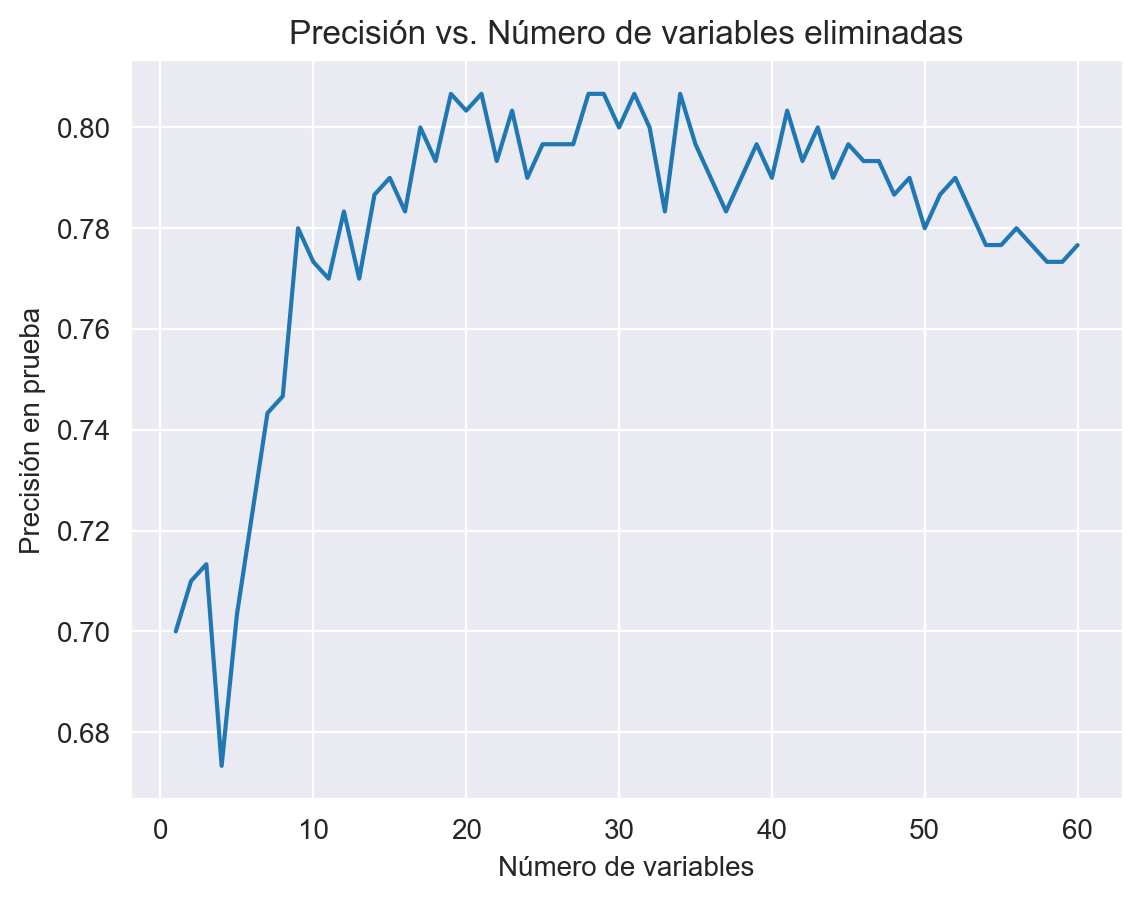

In [20]:
orden_vars, precisiones = eliminar_variables_recursivamente(dta_ohe)

# 8. Extra (10%)
Esta parte no es necesaria que se realice, son puntos extra a sumar a los de las partes anteriores.

La implementación *Random Forest* de sklearn lleva una propia cuenta de la relevancia de cada variable mediante una medida que tiene en cuenta el número de veces que esa variable se ha usado en los árboles del bosque y qué ganancia se ha obtenido en cada uno de los tests en los que esa variable se ha usado.

Encuentre este ranking de variables y compárelo con los obtenidos en los ejercicios anteriores.

In [21]:

def obtener_importancia_rf(dta_ohe, target_col='target', test_size=0.3, random_state=42):
    """
    Obtiene la importancia de variables de Random Forest y la compara con otros métodos.

    Args:
        dta_ohe (pd.DataFrame): DataFrame con variables codificadas one-hot.
        target_col (str): Nombre de la columna objetivo.
        test_size (float): Tamaño del conjunto de prueba.
        random_state (int): Semilla para reproducibilidad.

    Returns:
        pd.Series: Serie de Pandas con la importancia de variables.
    """
    X = dta_ohe.drop(columns=[target_col])
    y = dta_ohe[target_col]

    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state, stratify=y)

    model = RandomForestClassifier(random_state=random_state)
    model.fit(x_train, y_train)

    feature_importances = pd.Series(model.feature_importances_, index=x_train.columns).sort_values(ascending=False)

    print("Ranking de variables por importancia de Random Forest:")
    print(feature_importances)

    plt.figure(figsize=(10, len(feature_importances) * 0.3))
    sns.barplot(x=feature_importances, y=feature_importances.index)
    plt.title("Importancia de variables de Random Forest")
    plt.xlabel("Importancia")
    plt.ylabel("Variable")
    plt.show()

    return feature_importances



Ranking de variables por importancia de Random Forest:
creditamount            0.098348
duration                0.083847
age                     0.078989
existingchecking_A14    0.042202
existingchecking_A11    0.036925
                          ...   
foreignworker_A201      0.003667
job_A171                0.003427
purpose_A410            0.003231
purpose_A44             0.001061
purpose_A48             0.000834
Length: 61, dtype: float64


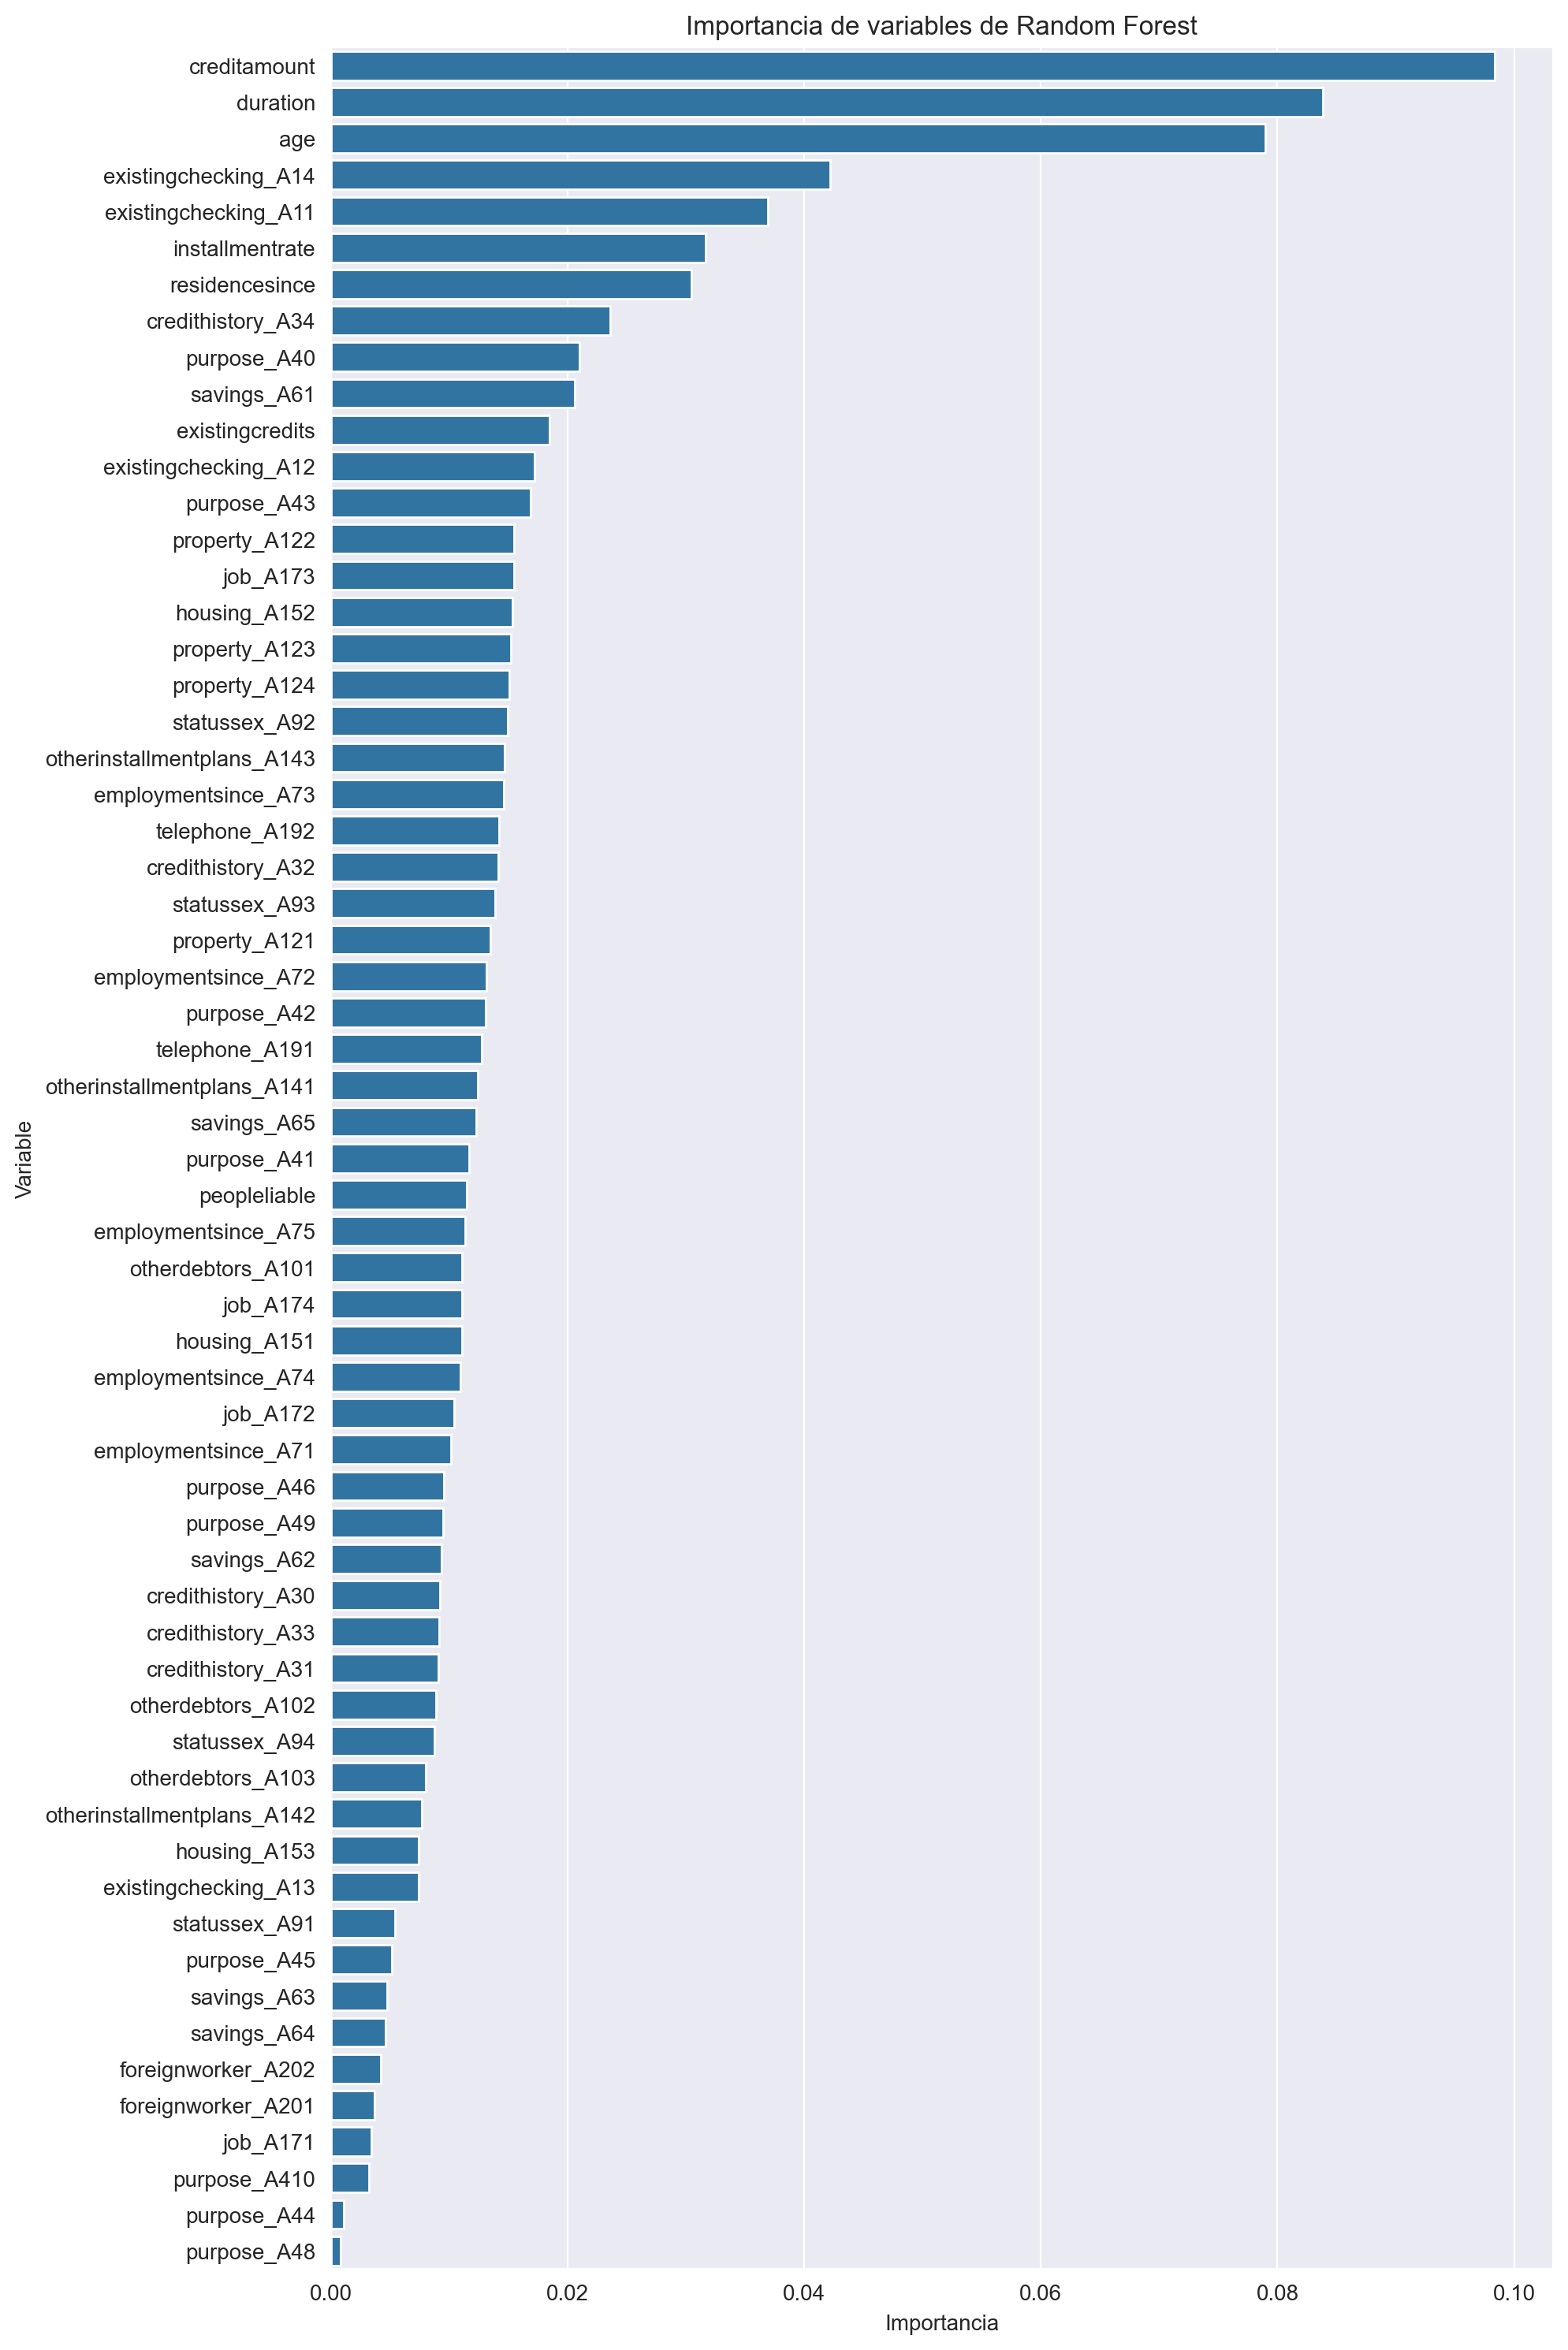

In [22]:
importancia_rf = obtener_importancia_rf(dta_ohe)